In [3]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import imutils
from glob import glob

In [5]:
root_folder = os.path.abspath('..')
path_imgs = os.path.join(root_folder, "img", "*ic[1-4].jpg")

path_imgs

'C:\\Users\\santo\\Digital-Image-Processing-2021.1\\img\\*ic[1-4].jpg'

### Execute image stitching

In [6]:

images = []

#loading all images

for img in glob(path_imgs):
  
  img = cv.imread(img)
  images.append(img)

#using opencv Stitcher_create function to get panoramic image

stitcher = cv.Stitcher_create()
(status, stitched) = stitcher.stitch(images)

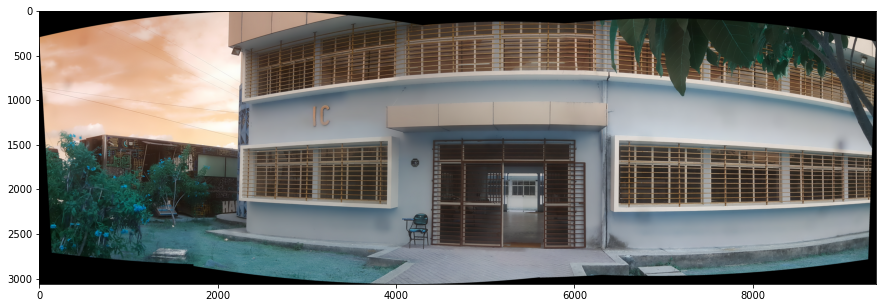

In [7]:
# plot panoramic image

plt.figure(figsize=(15,12))
plt.imshow(stitched);
plt.show()

### Remove black areas

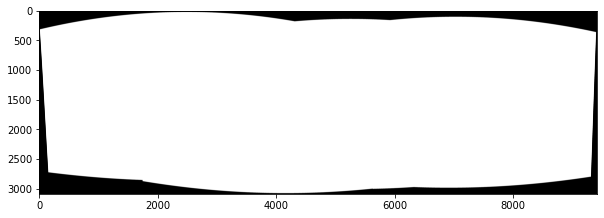

In [8]:
#padding stitched image with 15 pixels in top, botton, left and right
stitched2 = cv.copyMakeBorder(stitched.copy(), 15, 15, 15, 15, cv.BORDER_CONSTANT, (0, 0, 0))

#get gray panoramic image to apply threshold
gray = cv.cvtColor(stitched2, cv.COLOR_BGR2GRAY)

#create binary threshold to use in cv2.findContours (binary images are require)
thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY)[1]

plt.figure(figsize=(10,8))
plt.imshow(thresh, cmap='gray')
plt.show()

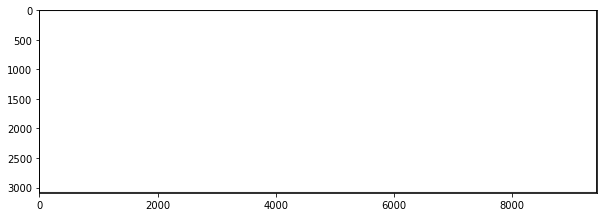

In [ ]:
#find all contorn of valid image
cnts = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

#get the biggest contorn of thresh image
cnts = imutils.grab_contours(cnts)
c = max(cnts, key = cv.contourArea)

#create a mask to get ROI
mask = np.zeros(thresh.shape, dtype="uint8")
(x, y, w, h) = cv.boundingRect(c)
cv.rectangle(mask, (x, y), (x + w, y + h), 255, -1)

plt.figure(figsize=(10,8))
plt.imshow(mask, cmap='gray')
plt.show()

In [ ]:
minRect = mask.copy()
sub = mask.copy()

#get the biggest contorn rectangle

while cv.countNonZero(sub) > 0:
  
  minRect = cv.erode(minRect, None)
  sub = cv.subtract(minRect, thresh)

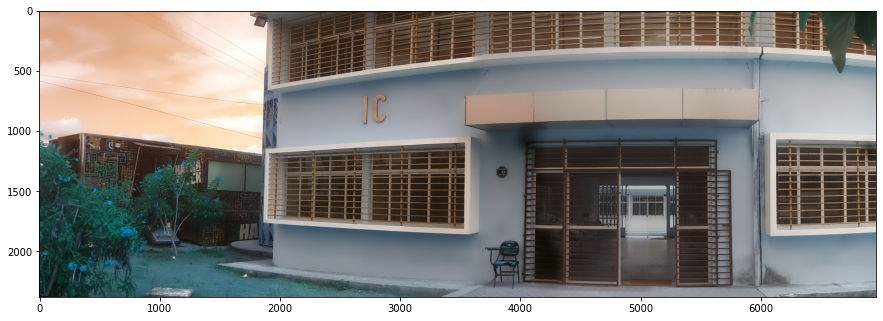

In [ ]:
cnts = cv.findContours(minRect.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

cnts = imutils.grab_contours(cnts)
c = max(cnts, key = cv.contourArea)
(x, y, w, h) = cv.boundingRect(c)
stitched = stitched[y:y + h, x:x + w]

plt.figure(figsize=(15,12))
plt.imshow(stitched)
plt.show()